In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import fashion_mnist

In [34]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [35]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
     

# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [36]:
# add noise
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
     

# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

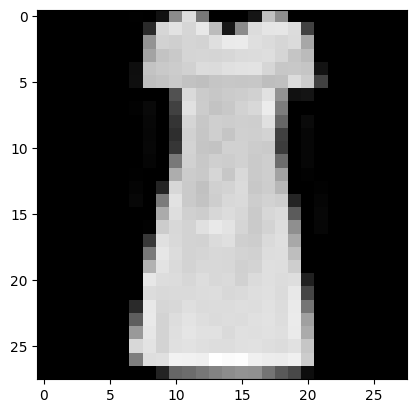

In [37]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

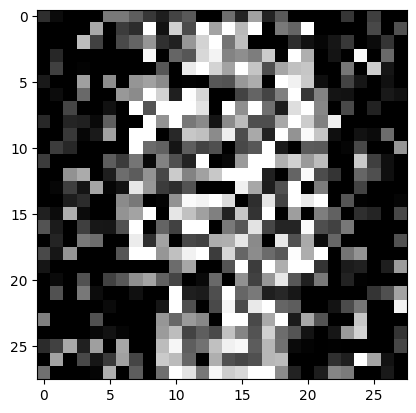

In [38]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

In [43]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 14, 16)      

In [40]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))
     

Epoch 1/20
235/235 [==============================] - 159s 669ms/step - loss: 0.3661 - val_loss: 0.3125
Epoch 2/20
235/235 [==============================] - 156s 666ms/step - loss: 0.3053 - val_loss: 0.3030
Epoch 3/20
235/235 [==============================] - 164s 696ms/step - loss: 0.2991 - val_loss: 0.2997
Epoch 4/20
235/235 [==============================] - 161s 684ms/step - loss: 0.2966 - val_loss: 0.2981
Epoch 5/20
235/235 [==============================] - 157s 669ms/step - loss: 0.2948 - val_loss: 0.2962
Epoch 6/20
235/235 [==============================] - 158s 675ms/step - loss: 0.2935 - val_loss: 0.2952
Epoch 7/20
235/235 [==============================] - 158s 673ms/step - loss: 0.2926 - val_loss: 0.2942
Epoch 8/20
235/235 [==============================] - 158s 672ms/step - loss: 0.2916 - val_loss: 0.2933
Epoch 9/20
235/235 [==============================] - 158s 672ms/step - loss: 0.2908 - val_loss: 0.2926
Epoch 10/20
235/235 [==============================] - 158s 673m

In [41]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 5s 17ms/step


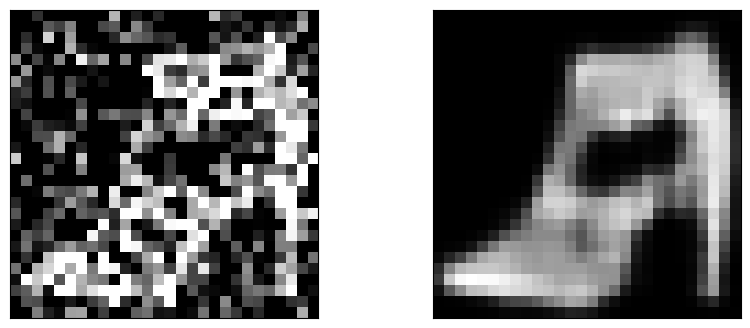

In [42]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()